In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 载入数据集
dataset = pd.read_csv("data/train_data_standardized.csv")
x_train = dataset[dataset.columns[1:]] # 绘制特征分布热图，不需要标签列，所以分离 x_train
y_train = dataset[['dic']].values.ravel()

dataset_test = pd.read_csv("data/test_data_standardized.csv")
x_test = dataset_test[dataset_test.columns[1:]]
y_test = dataset_test[['dic']].values.ravel()

In [3]:
# 设定阈值，比如非重复值个数少于一定数量时认为是分类变量
threshold = 2 # 可根据实际需求调整

# 自动提取列名，根据唯一值数量
columns_by_unique_count = x_train.nunique()  # 每列的唯一值个数

categorical_cols = columns_by_unique_count[columns_by_unique_count <= threshold].index.tolist()
continuous_cols = columns_by_unique_count[columns_by_unique_count > threshold].index.tolist()
print(categorical_cols)
print(continuous_cols)

['gender', 'ventilation', 'vasopressin', 'crrt', 'myocardial_infarct', 'congestive_heart_failure', 'peripheral_vascular_disease', 'cerebrovascular_disease', 'dementia', 'chronic_pulmonary_disease', 'rheumatic_disease', 'peptic_ulcer_disease', 'mild_liver_disease', 'diabetes_without_cc', 'diabetes_with_cc', 'paraplegia', 'renal_disease', 'malignant_cancer', 'severe_liver_disease', 'metastatic_solid_tumor', 'aids']
['sofa_score', 'age', 'los', 'scr_min', 'mdrd_est', 'scr_baseline', 'alt_min', 'alp_min', 'ast_min', 'sirs', 'lods', 'apsiii', 'wbc_max', 'basophils_abs_max', 'eosinophils_abs_min', 'lymphocytes_abs_min', 'monocytes_abs_min', 'neutrophils_abs_max', 'basophils_min', 'eosinophils_max', 'lymphocytes_min', 'monocytes_min', 'neutrophils_max', 'age_score', 'charlson_comorbidity_index', 'albumin_min', 'creatinine_max', 'sodium_min', 'inr_max', 'pt_max', 'ptt_max', 'hemoglobin_min', 'platelet_min', 'rbc_min', 'potassium_max', 'glucose_max', 'bicarbonate_min', 'bun_max', 'chloride_max'

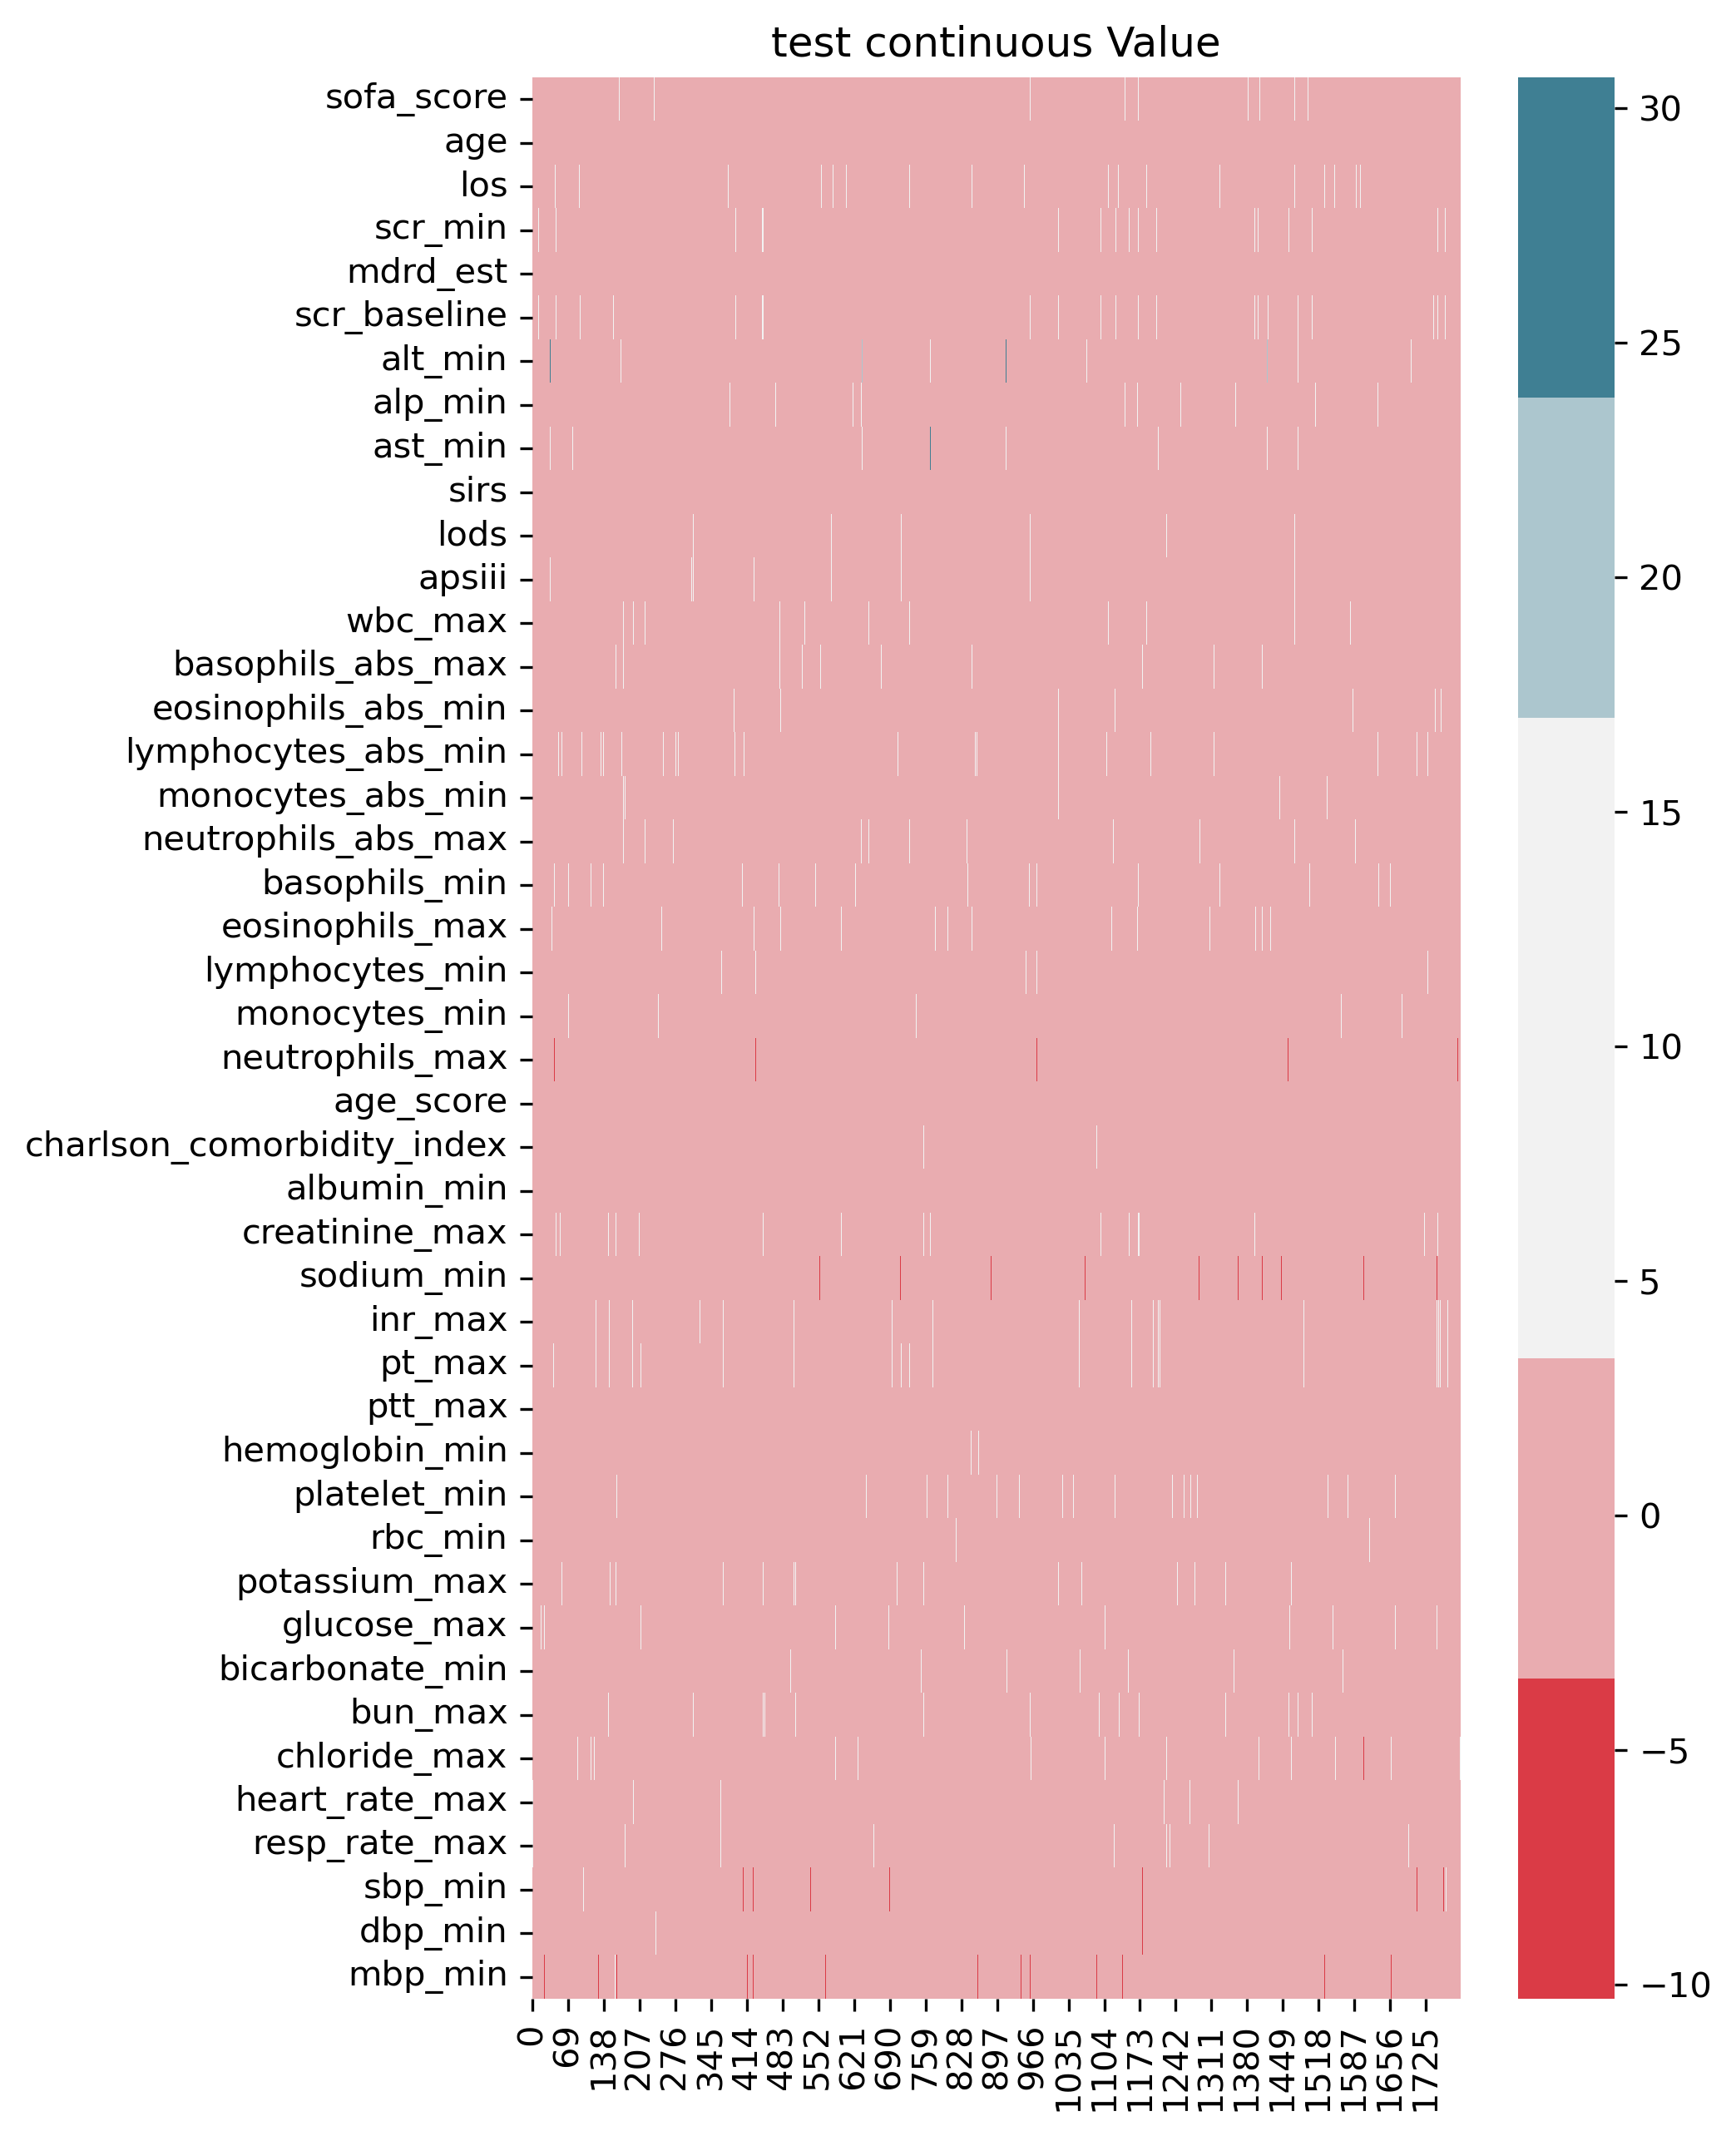

In [12]:
# 原始数据的热图（例如特征相关性）
# 热图的数值需要进行标准化，以便在一张热图中可视化所有的值
plt.figure(figsize=(6, 10), dpi = 300)
cmap=sns.diverging_palette(10, 220, sep=90) #1
#cmap = sns.color_palette("viridis", as_cmap=True) #2
#cmap = "coolwarm"
sns.heatmap(x_test[continuous_cols].T,cmap=cmap,  yticklabels=True) 
plt.title("test continuous Value")
#plt.savefig("fig/test分类变量数值分布热图2.png", dpi = 300)
plt.show()